EDA Coursera

In [39]:
# Librerías a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [40]:
df_coursera_courses = pd.read_csv('Coursera_courses.csv', sep=',')
df_coursera_reviews = pd.read_csv('coursera_reviews.csv', sep=',')

In [41]:
df_coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [42]:
df_coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454711 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


Unimos ambos datasets:

In [43]:
df_coursera_merged = df_coursera_courses.merge(df_coursera_reviews, on='course_id')
df_coursera_merged.head(2)

,name,institution,course_url,course_id,reviews,reviewers,date_reviews,rating
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,This is an extremely basic course. Machine lea...,Deleted A,2017-03-18,1
1,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning,The course is ok but the certification procedu...,Bruno C,2015-11-09,1


In [44]:
df_coursera_merged.shape

(1454711, 8)

In [45]:
df_coursera_merged.isna().sum()

name            0
institution     0
course_url      0
course_id       0
reviews         0
reviewers       0
date_reviews    0
rating          0
dtype: int64

In [59]:
df_rating = df_coursera_merged['rating'].astype(str)
df_rating = pd.DataFrame(df_rating)

Análisis de la columna raiting

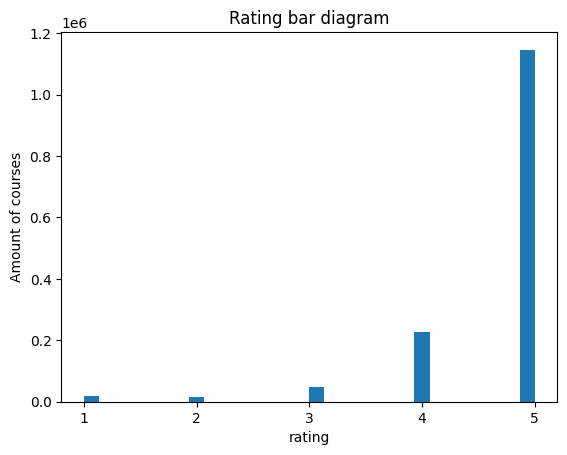

In [60]:
# Histograma
num_bins = 30
fig, ax = plt.subplots()
ax.set_xlabel('rating')
ax.set_ylabel('Amount of courses')
ax.set_title('Rating bar diagram')
n = ax.hist(df_rating['rating'], bins=num_bins)

In [73]:
r1 = df_rating[df_rating['rating'] == '1'].count()
r2 = df_rating[df_rating['rating'] == '2'].count()
r3 = df_rating[df_rating['rating'] == '3'].count()
r4 = df_rating[df_rating['rating'] == '4'].count()
r5 = df_rating[df_rating['rating'] == '5'].count()
r1 = r1[0]
r2 = r2[0]
r3 = r3[0]
r4 = r4[0]
r5 = r5[0]
sum_data = r1+r2+r3+r4+r5

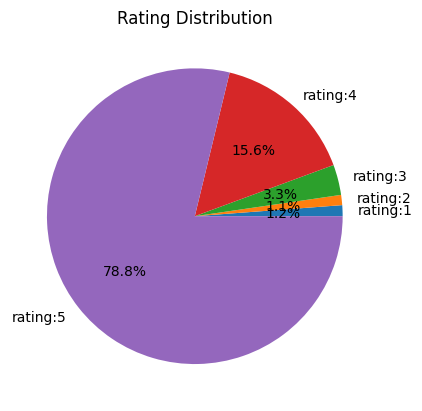

In [75]:
def create_pie_chart(data):
    # Check if the sum of data is equal to 100%
    total = sum(data)
    if total != sum_data:
        raise ValueError("The sum of data must be 100%.")

    # Create labels for the pie chart
    labels = ['rating:1', 'rating:2', 'rating:3', 'rating:4', 'rating:5']

    # Create the pie chart
    plt.pie(data, labels=labels, autopct='%1.1f%%')

    # Add a title
    plt.title("Rating Distribution")

    # Display the pie chart
    plt.show()

# Example data with 5 variables
data = [r1, r2, r3, r4, r5]

# Create the pie chart
create_pie_chart(data)

Podemos ver que los cursos de coursera tienen en su gran mayoría excelentes calificaciones, dominando con un 78.8% con 5 estrellas.

Ahora se filtrarán las instituciones que si cumplan con una cantidad de reviews mayor a 1000

Primero hacemos una tabla con la cuenta de reviews por institución:

In [104]:
df_grouped_coursea_2 = df_coursera_merged.groupby('institution')
df_grouped_coursea_2 = pd.DataFrame(df_grouped_coursea_2['reviews'].count())
df_grouped_coursea_2 = df_grouped_coursea_2.sort_values('reviews', ascending=False)
df_grouped_coursea_2.head(5)

,reviews
institution,
University of Michigan,167069
DeepLearning.AI,117029
Google,78613
IBM,70769
University of Pennsylvania,70531


Creamos una tabla con el promedio de rating que cada institución tiene:

In [103]:
df_grouped_coursea = df_coursera_merged.groupby('institution')
df_grouped_coursea = pd.DataFrame(df_grouped_coursea['rating'].mean())
df_grouped_coursea = df_grouped_coursea.sort_values('rating', ascending=False)
df_grouped_coursea.head(5)


,rating
institution,
GitLab,5.000000
UCL School of Management,4.948276
Google - Spectrum Sharing,4.931034
Hebrew University of Jerusalem,4.928451
The University of Chicago,4.921771


Unimos ambas tablas:

In [101]:
df_merged_grouped = df_grouped_coursea.merge(df_grouped_coursea_2, on='institution')

In [102]:
df_merged_grouped.head(5)

,rating,reviews
institution,,
GitLab,5.000000,15
UCL School of Management,4.948276,348
Google - Spectrum Sharing,4.931034,87
Hebrew University of Jerusalem,4.928451,2376
The University of Chicago,4.921771,1355


Filtramos las instituciones que Si cumplan con el mínimo de reviews:

In [106]:
df_merged_grouped = df_merged_grouped[df_merged_grouped['reviews'] >= 1000]
df_merged_grouped = df_merged_grouped.sort_values('rating', ascending=False)

In [107]:
df_merged_grouped.head(20)

,rating,reviews
institution,,
Hebrew University of Jerusalem,4.928451,2376
The University of Chicago,4.921771,1355
Arizona State University,4.912794,8027
Universidad de los Andes,4.906390,4006
Universidade Estadual de Campinas,4.903674,1007
University of Arizona,4.881919,2168
Yale University,4.879711,51850
IESE Business School,4.876233,3345
Yonsei University,4.875645,17820


Una recomendación es basarse en la lista TOP 20 de instituciones para seleccionar cursos potenciales para la nueva MOOC

Como un extra se analizará el crecimiento de los feedback a lo largo del tiempo

In [110]:
# Modificar formato para su utilización
df_coursera_merged['date_reviews'] = pd.to_datetime(df_coursera_merged['date_reviews'], format='%Y-%m-%d', errors='coerce')

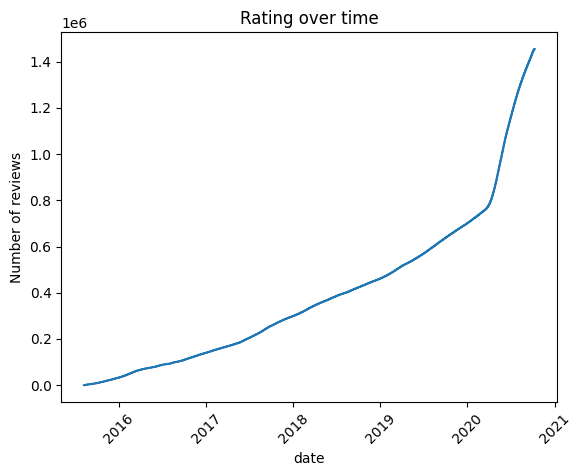

In [111]:
df_time = df_coursera_merged.sort_values('date_reviews')

df_time['count'] = range(1, len(df_time) + 1)

plt.plot(df_time['date_reviews'], df_time['count'])
plt.xlabel('date')
plt.ylabel('Number of reviews')
plt.title('courses over time')
plt.xticks(rotation=45)
plt.show()

In [112]:
# Regresar el formato a str para mejor visualización de tablas
df_coursera_merged['date_reviews'] = df_coursera_merged['date_reviews'].dt.strftime('%Y-%m-%d')

Ya viendo que los feedback por parte de los subscriptores están tomando mayor importancia con el paso del tiempo, se analizará un WordCloud para ver las palabras más comunes y conocer la opinión general de los cursos.

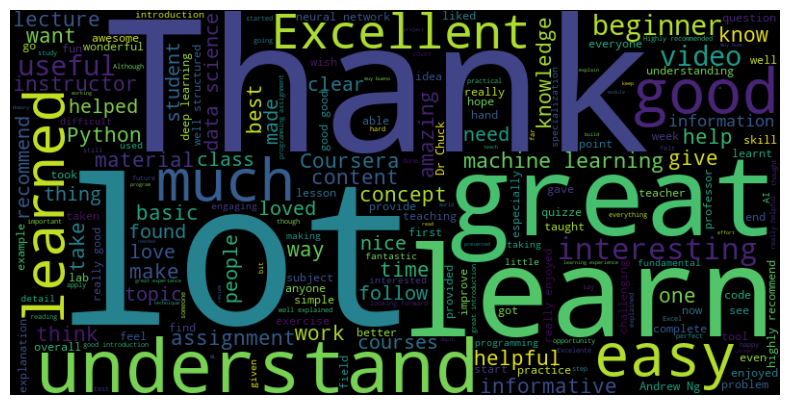

In [113]:
# Extraer el valor de la columna
summary_text = df_coursera_merged['reviews'].tolist()

# Unir los valore en una lista de texto
text = ' '.join(summary_text)
stopwords = set(STOPWORDS)
stopwords.update(['la', 'para', 'de la', 'de', 'que', 'con', 'y', 'y la', 'en el', 'en', 'el', 'use', 'este curso', 'este', 'curso', 'las', 'los', 'un', 'una', 'del', 'course', 'part', 'abstract', 'will', 'más', 's', 'available', 'su', 'tu', 'e', 'se', 'cómo', 'writing', 'Dr', 'Chuck', 'Dr Chuck', 'one', 'anyone'])
# Step 5: Create and generate word cloud
wordcloud = WordCloud(width=800, height=400, stopwords=stopwords).generate(text)

# Step 6: Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()